# TOPIC:   Predicting Customer Subscription to Term Deposits Using Bank Marketing Data

## Summary
1.Business Understanding

2.Data Understanding

3.Data Preparation

4.Modeling

5.Evaluation

6.Code Quality

## 1. Business Understanding
In this notebook, I am dealing with the data of a marketing campaign. Marketing campaigns are sets of strategic activities that promote a business's goal or objective. A marketing campaign could be used to promote a product, a service, or the brand as a whole.The primary goal is to predict whether a client will subscribe to a term deposit. This helps the bank focus its marketing efforts on clients with a higher probability of a positive response.

   ### 1.1 Problem Statement
   The bank is running marketing campaigns to promote term deposit subscriptions, but the conversion rate is relatively low.        Each campaign involves contacting thousands of clients, many of whom are not interested or eligible. This results in wasted      resources, increased operational costs, and reduced marketing efficiency.
  
  A successful predictive model enables the bank to:
  1. Focus marketing efforts on customers most likely to convert.
  2. Reduce operational costs by minimizing unnecessary calls.

  ### 1.2 Stakeholders for the Bank Marketing Campaign Project
 Identifying stakeholders is important to ensure that the insights and models developed from the bank marketing dataset are       aligned with business goals.
 
 ###### The key Stakeholders are:
1.Marketing Team: Optimize campaign targeting and messaging strategies.

2.Sales Executive: Increase conversion rates and ROI from outreach efforts.

3.Data Analysts: Build and evaluate predictive models; uncover meaningful customer patterns.
 

### 1.3 OBJECTIVES

1.Which customer attributes most strongly influence the likelihood of customers  subscribing to a term deposit?

2.How do campaign related factors influence the likelihood of a customer subscribing to a term deposit?

3.Can we accurately predict whether a customer will subscribe using machine learning models?




1. Customer Segmentation Objective:
Which demographic and financial characteristics (e.g., age, job type, marital status, balance) are most strongly associated with customers who subscribe to term deposits?

2. Campaign Optimization Objective:
How do campaign-related factors (e.g., number of contacts, duration of calls, day/month of contact) influence the likelihood of a customer subscribing to a term deposit?

3. Predictive Modeling Objective:
Can we build an accurate predictive model to determine whether a customer will subscribe to a term deposit based on historical data from previous marketing campaigns?

## 2.Data Understanding

   ### Dataset Overview
   1.Source :The data source for this analysis is from Kaggle - Bank Marketing Campaign Dataset. 
 
   2.Features: 16 input features + 1 target (deposit)

   ### 2.1 Load The Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


  ### 2.2 Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


## 3.Data Preparation

### 3.1 Handling Missing Values and Duplicates

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Length: 11162, dtype: bool

In [8]:
df=df.drop('contact',axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes


### 3.2. Handling Categorical Variables

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [10]:
# Categorical features:
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Numerical features:

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'deposit']


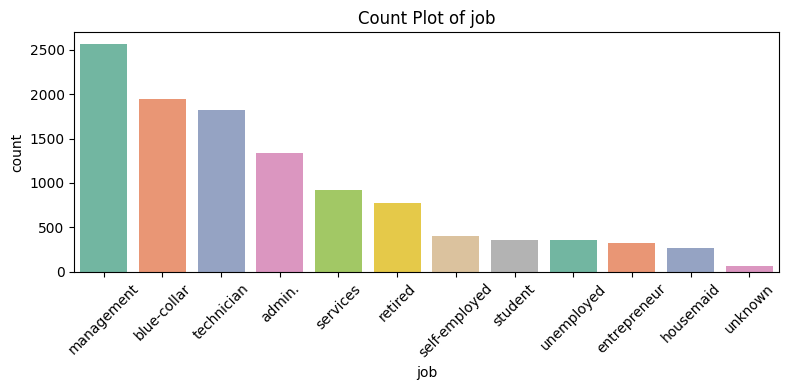

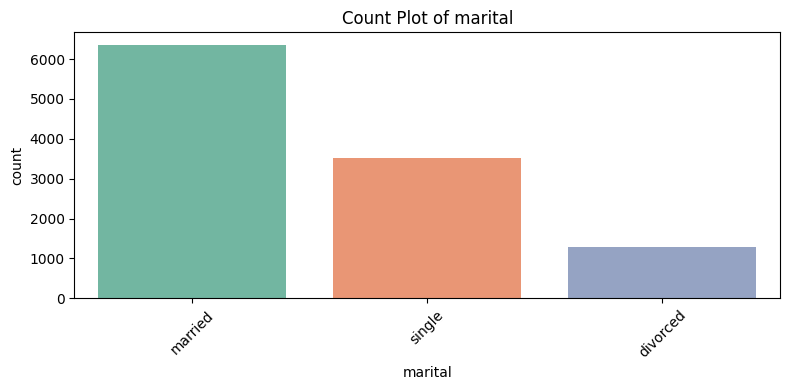

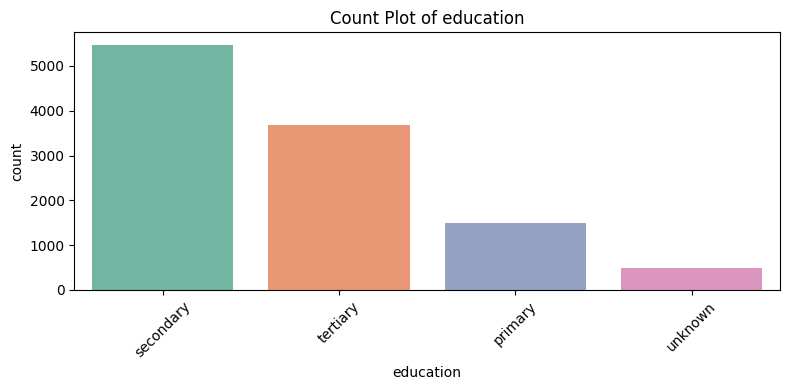

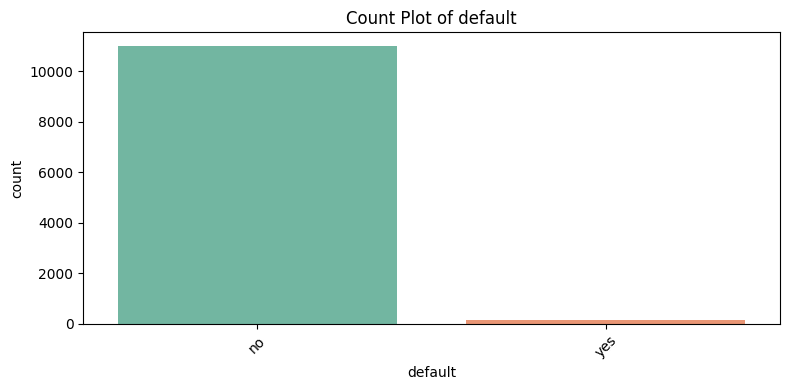

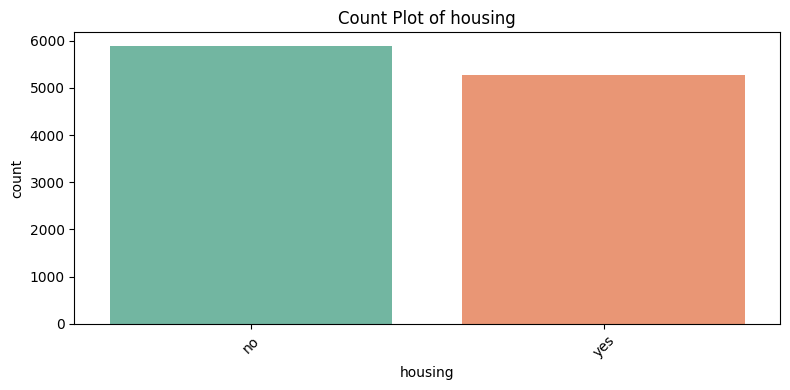

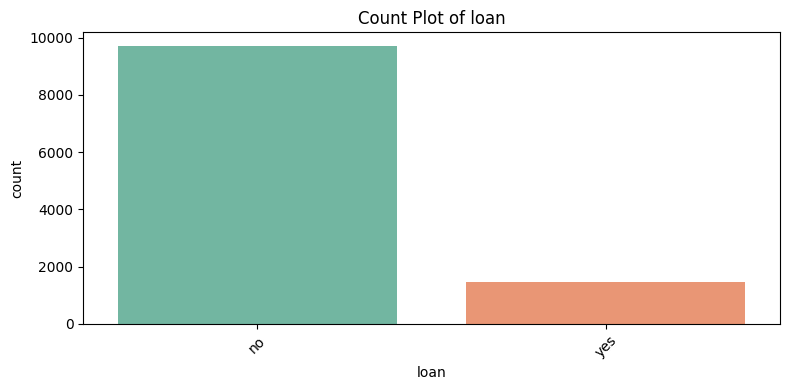

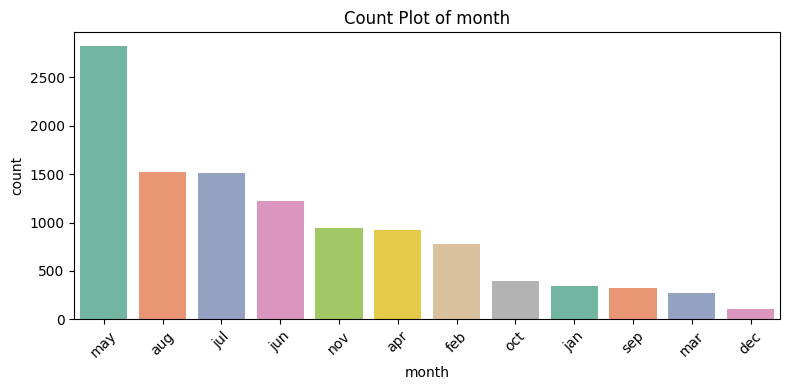

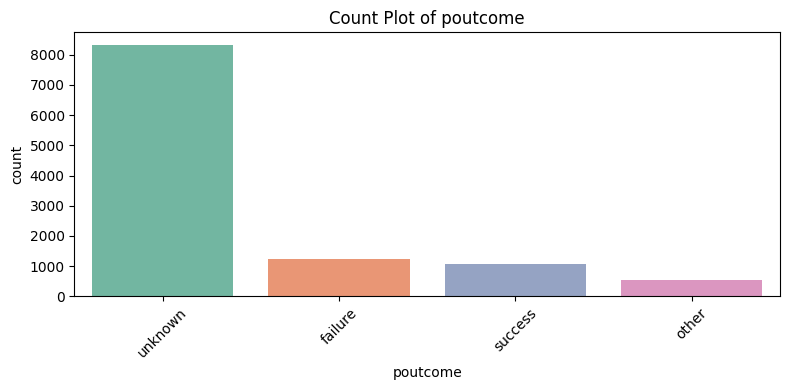

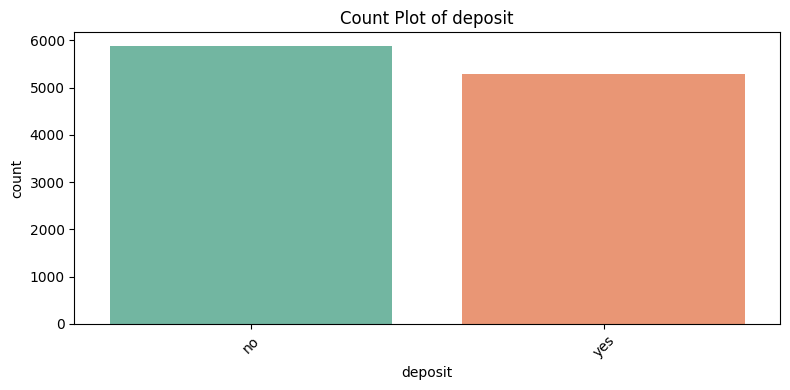

In [11]:
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
# Label Encoding for binary categories:

from sklearn.preprocessing import LabelEncoder

# Df_copy
df_prepared = df.copy()

binary_col = ['default', 'housing', 'loan', 'deposit']

le = LabelEncoder()
for col in binary_col:
    df_prepared[col] = le.fit_transform(df_prepared[col])
df_prepared   

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,0,733,0,0,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,0,29,0,0,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,0,0,0,1,8,may,9,2,172,5,failure,0


In [13]:
#One-Hot Encoding for multi-category variables:

multi_category_col = ['job', 'marital', 'education', 'poutcome', 'month']
df_prepared = pd.get_dummies(df_prepared, columns=multi_category_col, drop_first=True)
df_prepared


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
11158,39,0,733,0,0,16,83,4,-1,0,...,0,0,0,0,1,0,0,0,0,0
11159,32,0,29,0,0,19,156,2,-1,0,...,0,0,0,0,0,0,0,0,0,0
11160,43,0,0,0,1,8,9,2,172,5,...,0,0,0,0,0,0,1,0,0,0


In [14]:
df_prepared.corr=df_prepared.corr()['deposit']
df_prepared.corr

age                    0.034901
default               -0.040680
balance                0.081129
housing               -0.203888
loan                  -0.110580
day                   -0.056326
duration               0.451919
campaign              -0.128081
pdays                  0.151593
previous               0.139867
deposit                1.000000
job_blue-collar       -0.100840
job_entrepreneur      -0.034443
job_housemaid         -0.024155
job_management         0.036301
job_retired            0.103827
job_self-employed     -0.004707
job_services          -0.044531
job_student            0.099953
job_technician        -0.011557
job_unemployed         0.033487
job_unknown            0.001889
marital_married       -0.092157
marital_single         0.094632
education_secondary   -0.051952
education_tertiary     0.094598
education_unknown      0.014355
poutcome_other         0.044059
poutcome_success       0.286642
poutcome_unknown      -0.230470
month_aug             -0.016621
month_de

## 4.Modeling

building and evaluating machine learning models to predict whether a customer will subscribe to a term deposit

### 4.1. Define Features and Target Variable


In [19]:
x = df_prepared.drop('deposit', axis=1)
y = df_prepared['deposit']



### 4.2. Split the Dataset into Train and Test Sets


In [22]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
